In [156]:
%run magic.py

In [157]:
import pandas as pd
df = pd.read_csv("train.csv")

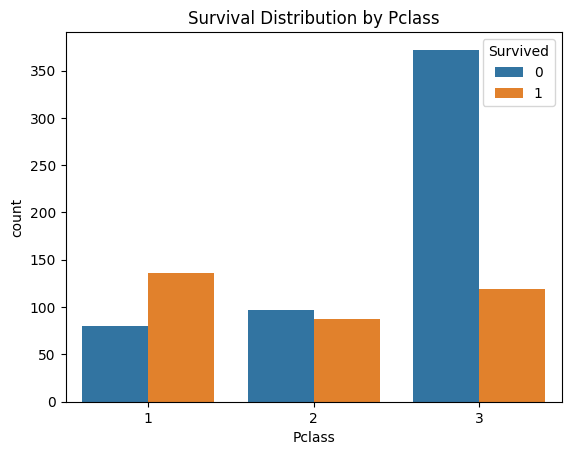

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution by Pclass')
plt.show()

In [159]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
%%add_to TitanicPreprocessor fill_age_na
import pandas as pd
df['Age'] = df['Age'].fillna(0)
df['Age'].isna().sum()
df['Embarked'].fillna('S', inplace=True)
df['Cabin'].fillna('U', inplace=True)

Creating instance of class TitanicPreprocessor


In [161]:
%%add_to TitanicPreprocessor fill_all
import pandas as pd
for col in df.columns:
    df[col].fillna(0, inplace=True)

In [162]:
df.isna().sum().sum()

0

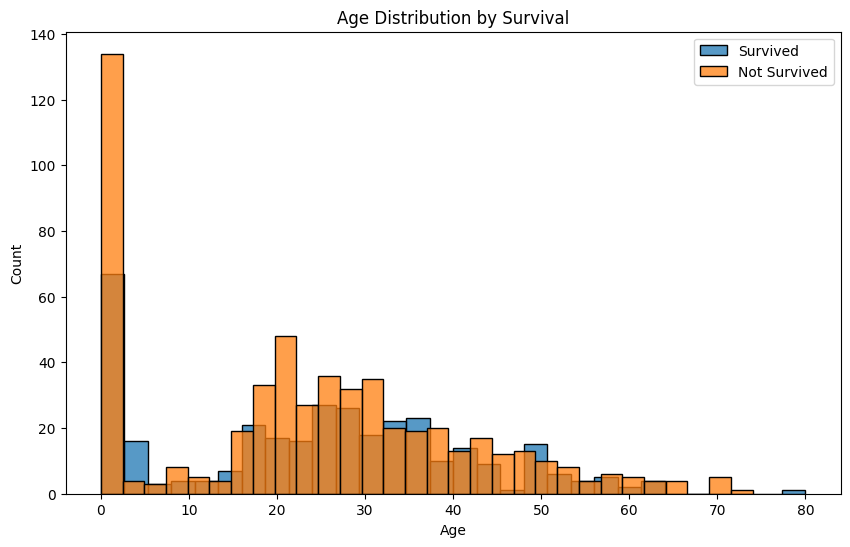

In [163]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], label='Survived', kde=False, bins=30)
sns.histplot(df[df['Survived'] == 0]['Age'], label='Not Survived', kde=False, bins=30)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

In [164]:
%%add_to TitanicPreprocessor get_dummies
import pandas as pd
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

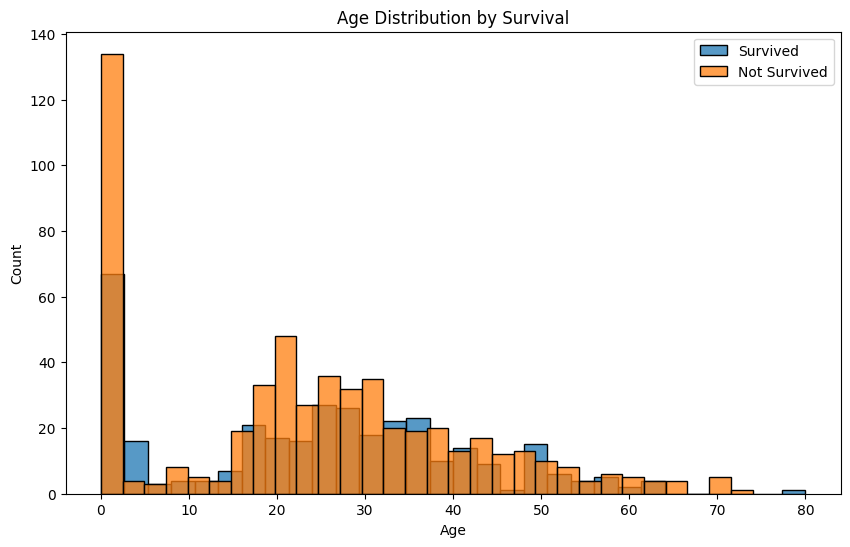

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], label='Survived', kde=False, bins=30)
sns.histplot(df[df['Survived'] == 0]['Age'], label='Not Survived', kde=False, bins=30)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

In [166]:
%%add_to TitanicPreprocessor add_family_size
import pandas as pd
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [167]:
%%add_to TitanicPreprocessor feature_selection
import pandas as pd
# select only numeruc columns
df = df.select_dtypes(include='number')

In [168]:
%%add_to TitanicModelTrainer train_model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
x = df.drop('Survived', axis=1)
y = df['Survived']
model.fit(x, y)
df = model

Creating instance of class TitanicModelTrainer


In [169]:
%%export_all
print("Done")